# Secondary Text Clean
The purpose of this notebook is to continue cleaning text data, from the compiled dataframe in combined_transcript_df.pickle.  Next steps are to see if speaker can be added, and decide which General Election Presidential Debates to use - Commission for Presidential Dates or American President Project.

In [1]:
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
import pickle

## Loading in the Data:

Data is stored in the Data folder as combined_transcrip_df.pickle.

In [2]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis'

In [3]:
cd Data

/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis/Data


In [4]:
with open('combined_transcript_df.pickle','rb') as read_file:
    combined_transcripts = pickle.load(read_file)

In [5]:
combined_transcripts.head()

,Date,Debate_Name,Transcript,Debate_Type,Data_Source
0,"October 22, 2020",Presidential Debate at Belmont University in N...,WELKER: A very good evening to both of you. Th...,General-President,American Presidency Project
1,"October 22, 2020",Presidential Debate at Belmont University in N...,And we will begin with the fight against the c...,General-President,American Presidency Project
2,"October 22, 2020",Presidential Debate at Belmont University in N...,"TRUMP: So, as you know, more 2.2 million peopl...",General-President,American Presidency Project
3,"October 22, 2020",Presidential Debate at Belmont University in N...,"WELKER: OK, former Vice President Biden, to yo...",General-President,American Presidency Project
4,"October 22, 2020",Presidential Debate at Belmont University in N...,"BIDEN: 220,000 Americans dead. If you hear not...",General-President,American Presidency Project


In [6]:
combined_transcripts.shape

(94729, 5)

# Initial EDA

In order to analyze any changes over time, I'll want to change the date to a date-time object.

In [7]:
combined_transcripts.dtypes

Date           object
Debate_Name    object
Transcript     object
Debate_Type    object
Data_Source    object
dtype: object

In [8]:
combined_transcripts['Date_Time_Date'] = pd.to_datetime(combined_transcripts['Date'])

In [9]:
combined_transcripts['line_length'] = 0
for i, text in enumerate(combined_transcripts.line_length):
    combined_transcripts['line_length'].iloc[i] = len(combined_transcripts.Transcript.iloc[i].split(" "))

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
combined_transcripts.head()

,Date,Debate_Name,Transcript,Debate_Type,Data_Source,Date_Time_Date,line_length
0,"October 22, 2020",Presidential Debate at Belmont University in N...,WELKER: A very good evening to both of you. Th...,General-President,American Presidency Project,2020-10-22,124
1,"October 22, 2020",Presidential Debate at Belmont University in N...,And we will begin with the fight against the c...,General-President,American Presidency Project,2020-10-22,81
2,"October 22, 2020",Presidential Debate at Belmont University in N...,"TRUMP: So, as you know, more 2.2 million peopl...",General-President,American Presidency Project,2020-10-22,372
3,"October 22, 2020",Presidential Debate at Belmont University in N...,"WELKER: OK, former Vice President Biden, to yo...",General-President,American Presidency Project,2020-10-22,23
4,"October 22, 2020",Presidential Debate at Belmont University in N...,"BIDEN: 220,000 Americans dead. If you hear not...",General-President,American Presidency Project,2020-10-22,301


Has the average length of responses changed over time?

In [11]:
line_time = combined_transcripts.groupby(combined_transcripts.Date_Time_Date.dt.year).agg({'line_length':['count', 'mean']})

Plotting the above line_time grouping as a visualization:

In [12]:
X = list(line_time.index)
y = list(line_time.iloc[:,1])

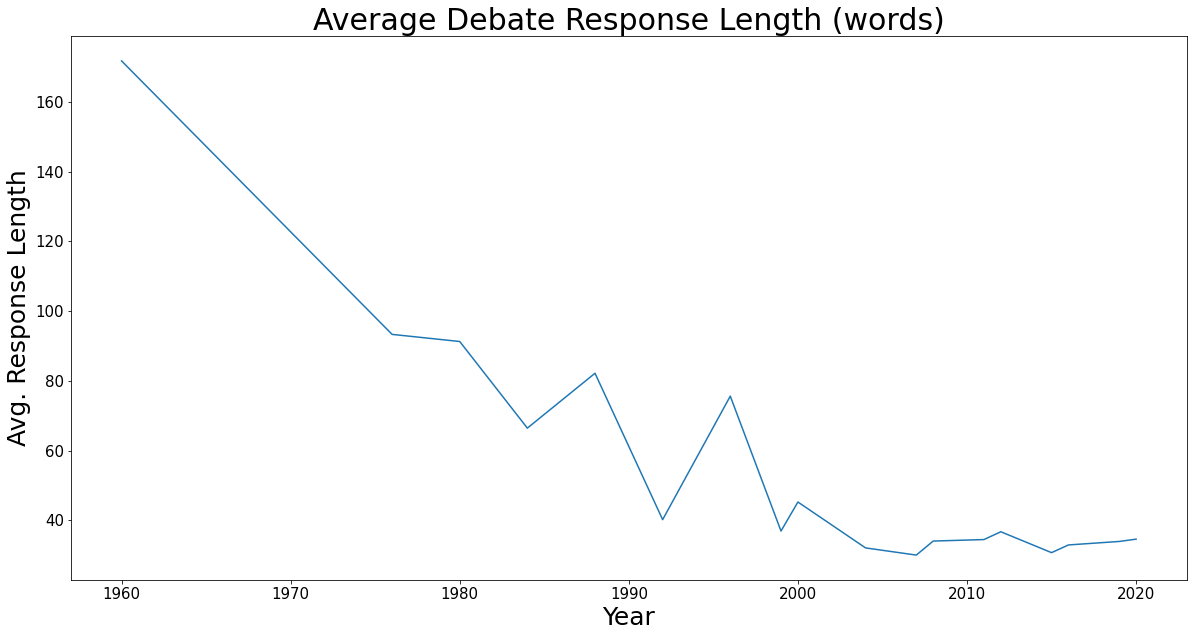

In [13]:
plt.plot(X, y)
plt.xlabel('Year', size=25)
plt.ylabel('Avg. Response Length', size=25)
plt.title('Average Debate Response Length (words)', size=30)
plt.xticks(size=15)
plt.yticks(size=15);

As the above shows, the average line length decreases substantially from 1960 to 2020.  This seems to indicate the presence of more "interjection" between the candidates and moderator.  From 2000-present, it seems like the average has settled right around 40 words.

How many responses of under 40 words were there?

In [14]:
less_than_40 = combined_transcripts[combined_transcripts.line_length <= 40]

In [15]:
line_time_2 = less_than_40.groupby(less_than_40.Date_Time_Date.dt.year).agg({'line_length':'count'})

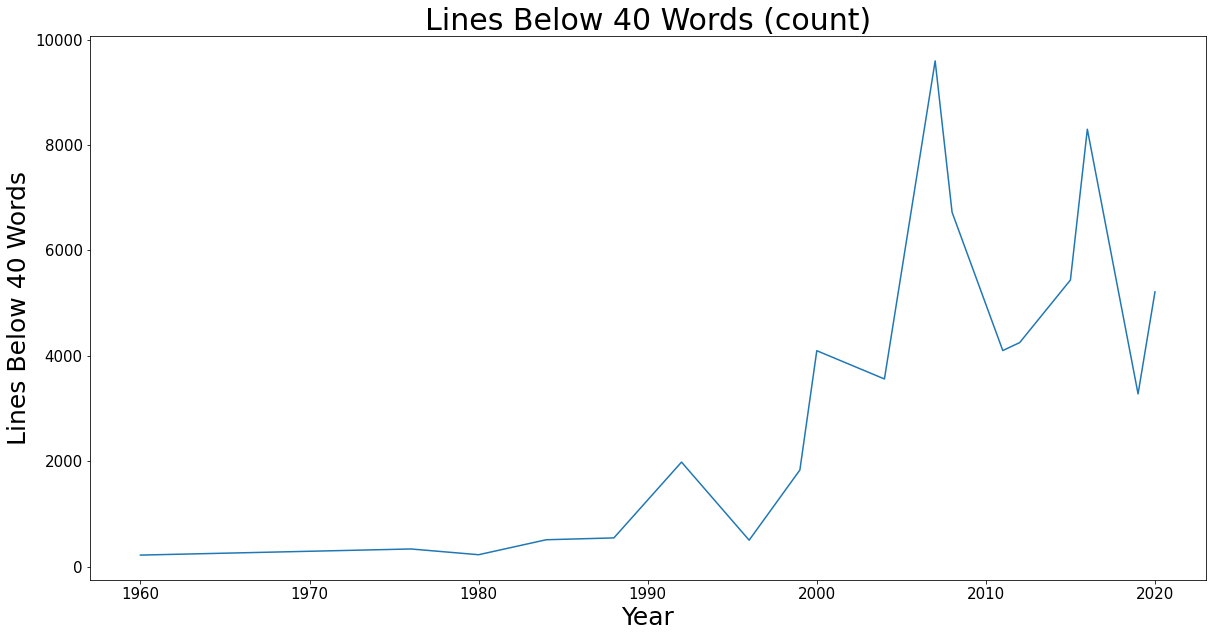

In [16]:
X = list(line_time_2.index)
y2 = list(line_time_2.iloc[:,0])
plt.plot(X, y2)
plt.xlabel('Year', size=25)
plt.ylabel('Lines Below 40 Words', size=25)
plt.title('Lines Below 40 Words (count)', size=30)
plt.xticks(size=15)
plt.yticks(size=15);

Finally, what percent of the lines (rows) are under 40 words?

In [17]:
percent_df = pd.concat([line_time, line_time_2], axis=1)

In [18]:
percent_df['under_40_rate'] = 100 * percent_df['line_length'] / percent_df[('line_length', 'count')]

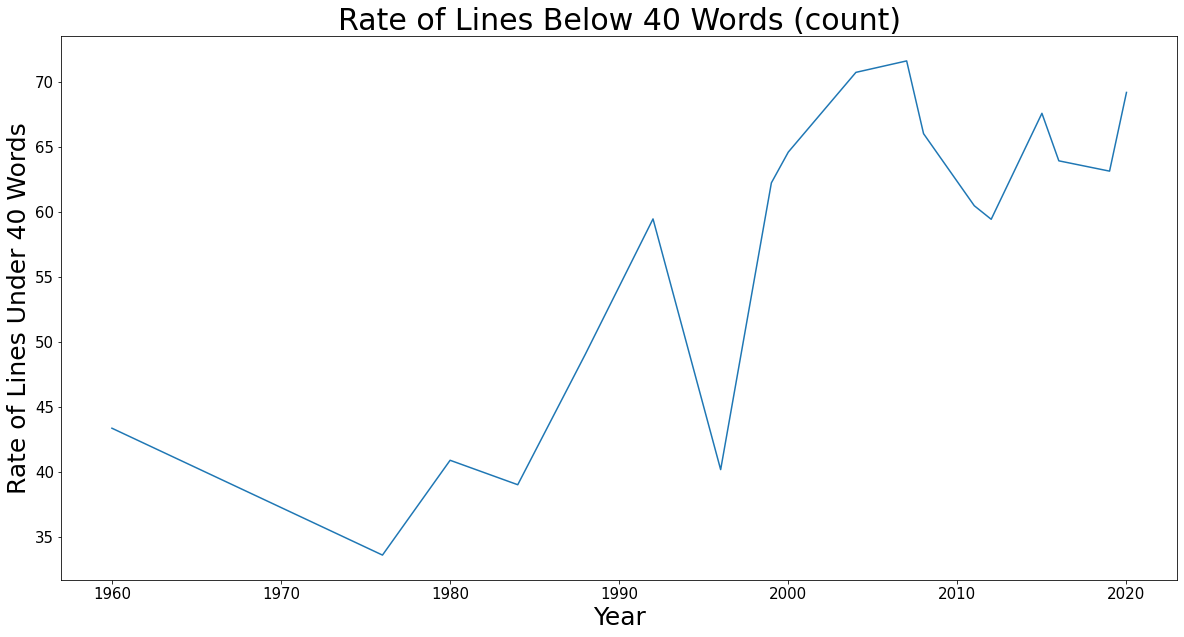

In [19]:
X = list(percent_df.index)
y_3 = list(percent_df['under_40_rate'])
plt.plot(X, y_3)
plt.xlabel('Year', size=25)
plt.ylabel('Rate of Lines Under 40 Words', size=25)
plt.title('Rate of Lines Below 40 Words (count)', size=30)
plt.xticks(size=15)
plt.yticks(size=15);

What is the Average Length of Response over time, by debate type?

In [39]:
type_time = combined_transcripts.groupby([combined_transcripts.Date_Time_Date.dt.year, combined_transcripts.Debate_Type]).agg({'line_length':['mean']}).reset_index()

In [40]:
types = ['General-President', 'General-VP', 'Primary-Democrat', 'Primary-Republican'] 

In [41]:
type_time.head()

,Date_Time_Date,Debate_Type,line_length
,,,mean
0,1960,General-President,171.714844
1,1976,General-President,87.368421
2,1976,General-VP,167.426667
3,1980,General-President,91.298214
4,1984,General-President,54.631383


In [42]:
type_time.iloc[:, 1]

0      General-President
1      General-President
2             General-VP
3      General-President
4      General-President
5             General-VP
6      General-President
7             General-VP
8      General-President
9             General-VP
10     General-President
11            General-VP
12      Primary-Democrat
13    Primary-Republican
14     General-President
15            General-VP
16      Primary-Democrat
17    Primary-Republican
18     General-President
19            General-VP
20      Primary-Democrat
21      Primary-Democrat
22    Primary-Republican
23     General-President
24            General-VP
25      Primary-Democrat
26    Primary-Republican
27     General-President
28    Primary-Republican
29     General-President
30            General-VP
31    Primary-Republican
32      Primary-Democrat
33    Primary-Republican
34     General-President
35            General-VP
36      Primary-Democrat
37    Primary-Republican
38      Primary-Democrat
39     General-President


In [43]:
type_time[type_time.iloc[:, 1] == 'General-VP'] 

,Date_Time_Date,Debate_Type,line_length
,,,mean
2,1976,General-VP,167.426667
5,1984,General-VP,120.058824
7,1988,General-VP,97.437086
9,1992,General-VP,27.887681
11,1996,General-VP,123.203540
15,2000,General-VP,134.507109
19,2004,General-VP,28.287420
24,2008,General-VP,41.726161
30,2012,General-VP,26.895850


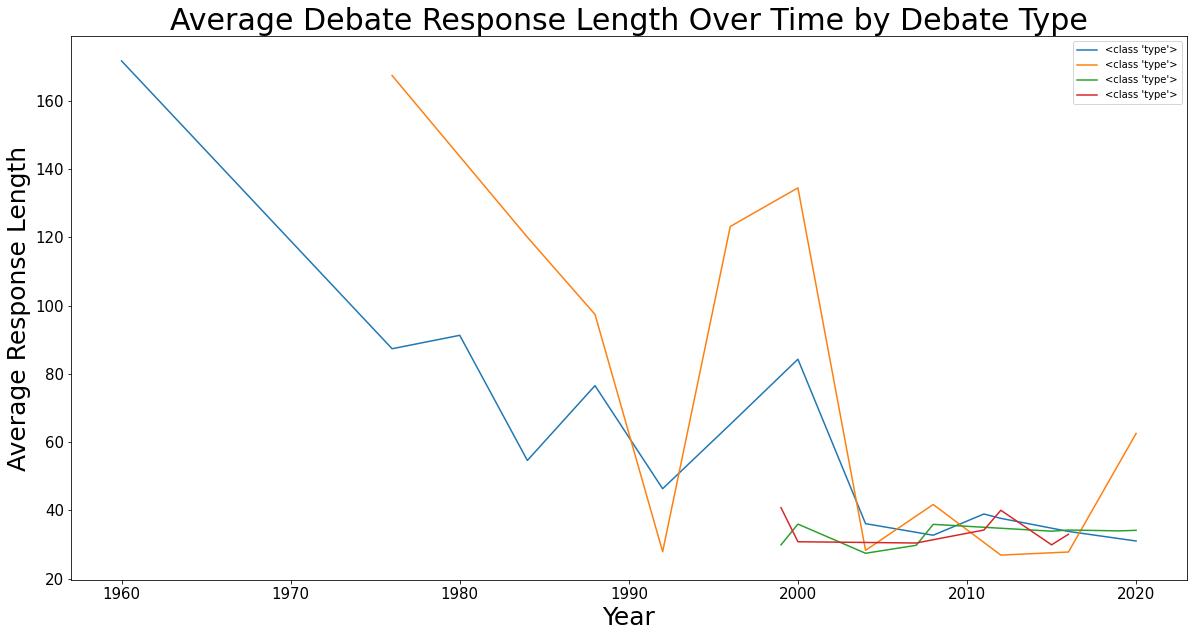

In [45]:
legend = []
for election_type in types:
    x = type_time[type_time.iloc[:, 1] == election_type].iloc[:, 0]
    y = type_time[type_time.iloc[:, 1] == election_type].iloc[:, 2]
    legend.append(type)
    plt.plot(x,y)
plt.xlabel('Year', size=25)
plt.ylabel('Average Response Length', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Debate Response Length Over Time by Debate Type', size=30)
plt.legend(labels=legend);

# Text Pre-processing / NLP

Creating a new database to work with for NLP:

In [46]:
nlp_df = combined_transcripts.copy().reset_index(drop=True)

For this section, will utilize NLTK for NLP:

In [47]:
from __future__ import print_function
import nltk
import pandas as pd

Tokenizing the transcript text using nltk's word_tokenizer:

In [48]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [49]:
nlp_df.head()

,Date,Debate_Name,Transcript,Debate_Type,Data_Source,Date_Time_Date,line_length
0,"October 22, 2020",Presidential Debate at Belmont University in N...,WELKER: A very good evening to both of you. Th...,General-President,American Presidency Project,2020-10-22,124
1,"October 22, 2020",Presidential Debate at Belmont University in N...,And we will begin with the fight against the c...,General-President,American Presidency Project,2020-10-22,81
2,"October 22, 2020",Presidential Debate at Belmont University in N...,"TRUMP: So, as you know, more 2.2 million peopl...",General-President,American Presidency Project,2020-10-22,372
3,"October 22, 2020",Presidential Debate at Belmont University in N...,"WELKER: OK, former Vice President Biden, to yo...",General-President,American Presidency Project,2020-10-22,23
4,"October 22, 2020",Presidential Debate at Belmont University in N...,"BIDEN: 220,000 Americans dead. If you hear not...",General-President,American Presidency Project,2020-10-22,301


First, removing punctuation from the text and lower-casing all text:

In [50]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

nlp_df['no_punc'] = nlp_df.Transcript.map(alphanumeric).map(punc_lower)
nlp_df.head()

,Date,Debate_Name,Transcript,Debate_Type,Data_Source,Date_Time_Date,line_length,no_punc
0,"October 22, 2020",Presidential Debate at Belmont University in N...,WELKER: A very good evening to both of you. Th...,General-President,American Presidency Project,2020-10-22,124,welker a very good evening to both of you th...
1,"October 22, 2020",Presidential Debate at Belmont University in N...,And we will begin with the fight against the c...,General-President,American Presidency Project,2020-10-22,81,and we will begin with the fight against the c...
2,"October 22, 2020",Presidential Debate at Belmont University in N...,"TRUMP: So, as you know, more 2.2 million peopl...",General-President,American Presidency Project,2020-10-22,372,trump so as you know more million peopl...
3,"October 22, 2020",Presidential Debate at Belmont University in N...,"WELKER: OK, former Vice President Biden, to yo...",General-President,American Presidency Project,2020-10-22,23,welker ok former vice president biden to yo...
4,"October 22, 2020",Presidential Debate at Belmont University in N...,"BIDEN: 220,000 Americans dead. If you hear not...",General-President,American Presidency Project,2020-10-22,301,biden americans dead if you hear nothing...


Adding in a word tokenization column on the lowercased/punctuation removed column:

In [51]:
nlp_df['token'] = nlp_df['no_punc'].apply(word_tokenize)

next, removing stop words from the tokenized column:

In [52]:
from nltk.corpus import stopwords

In [53]:
stop_words = stopwords.words('english')

In [54]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Adding common punctuation to the stop words:

In [238]:
stop_words += ['.', ',', '(', ')', "'", '"', "!"]

Adding in some other phrases (applause, etc.)

In [55]:
stop_words += ['(applause)', '[applause]', '[bells ring]']

In [57]:
nlp_df['no_stop_words'] = nlp_df['token'].apply(lambda x: [word for word in x if word not in stop_words])

In [58]:
nlp_df.head()

,Date,Debate_Name,Transcript,Debate_Type,Data_Source,Date_Time_Date,line_length,no_punc,token,no_stop_words
0,"October 22, 2020",Presidential Debate at Belmont University in N...,WELKER: A very good evening to both of you. Th...,General-President,American Presidency Project,2020-10-22,124,welker a very good evening to both of you th...,"[welker, a, very, good, evening, to, both, of,...","[welker, good, evening, debate, cover, six, ma..."
1,"October 22, 2020",Presidential Debate at Belmont University in N...,And we will begin with the fight against the c...,General-President,American Presidency Project,2020-10-22,81,and we will begin with the fight against the c...,"[and, we, will, begin, with, the, fight, again...","[begin, fight, coronavirus, president, trump, ..."
2,"October 22, 2020",Presidential Debate at Belmont University in N...,"TRUMP: So, as you know, more 2.2 million peopl...",General-President,American Presidency Project,2020-10-22,372,trump so as you know more million peopl...,"[trump, so, as, you, know, more, million, peop...","[trump, know, million, people, modeled, expect..."
3,"October 22, 2020",Presidential Debate at Belmont University in N...,"WELKER: OK, former Vice President Biden, to yo...",General-President,American Presidency Project,2020-10-22,23,welker ok former vice president biden to yo...,"[welker, ok, former, vice, president, biden, t...","[welker, ok, former, vice, president, biden, w..."
4,"October 22, 2020",Presidential Debate at Belmont University in N...,"BIDEN: 220,000 Americans dead. If you hear not...",General-President,American Presidency Project,2020-10-22,301,biden americans dead if you hear nothing...,"[biden, americans, dead, if, you, hear, nothin...","[biden, americans, dead, hear, nothing, else, ..."


Now that the text has been word tokenized and preprocessed, converting back to string and vectorizing to create a document-term Matrix 

For the time being, I am only going to use the American Presidency Project data, otherwise I'll have duplicate debates..

In [69]:
new_df = nlp_df[nlp_df.Data_Source == 'American Presidency Project']['no_stop_words'].reset_index()

In [70]:
new_df['string'] = 0
for i, text in enumerate(new_df['no_stop_words']):
    new_df.iloc[i, 2] = ' '.join(text)
new_df.head()

,index,no_stop_words,string
0,0,"[welker, good, evening, debate, cover, six, ma...",welker good evening debate cover six major top...
1,1,"[begin, fight, coronavirus, president, trump, ...",begin fight coronavirus president trump first ...
2,2,"[trump, know, million, people, modeled, expect...",trump know million people modeled expected die...
3,3,"[welker, ok, former, vice, president, biden, w...",welker ok former vice president biden would le...
4,4,"[biden, americans, dead, hear, nothing, else, ...",biden americans dead hear nothing else say ton...


Initializing Count Vectorizer:

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

In [72]:
X = new_df['string']
cv_model = cv1.fit_transform(X)

In [73]:
term_document_matrix = pd.DataFrame(cv_model.toarray(), columns=cv1.get_feature_names())

In [74]:
term_document_matrix.shape

(79347, 24520)

In [75]:
term_document_matrix.head()

,aa,aaa,aapi,aaron,aarp,aback,abadnini,abandon,abandoned,abandoning,...,zones,zoning,zoom,zubowski,zuckerberg,zuckerburg,zuech,³mr,³well,³who
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pickling the current term_document_matrix:

In [77]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis/Data'

In [78]:
with open('initial_term_document_matrix.pickle', 'wb') as to_write:
    pickle.dump(term_document_matrix, to_write)

## Next Steps: 
- model_tagging.ipynb  
    - Try to fix up the original dataframe to tag speakers, if I can get this done it would make my analysis more powerful since it could get down to the speaker level.
- topic_modeling_intitial.ipynb
    - Initial attempts at topic modeling on this pickled file.